In [1]:
import os
import cv2

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, BatchNormalization
from keras.layers import Flatten, Dense, Dropout

# Data Preparation

In [2]:
training_dir = "./FER2013/train" #training directory
testing_dir = "./FER2013/test" #testing directory

In [3]:
subdirs = list(os.walk(training_dir))[0]
print(subdirs)
labels = subdirs[1]
print("labels: ",end = ' ')
print(labels)

('./FER2013/train', ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'], [])
labels:  ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [4]:
#encoding the emotions to numerical values
emotion2num = {em:i for i,em in enumerate(labels)}
num2emotion = {i:em for i,em in enumerate(labels)}

In [5]:
def load_images_from_folder(folder, labels):
    '''
    @brief: takes in the folder's directory and the list of labels and returns all the images
    from the folder with their labels
    @params: folder = input directory
    labels = list of labels
    '''
    images = []
    image_labels = []
    for label in labels:
        subfolder = os.path.join(folder,label)
        for filename in os.listdir(subfolder):
            file = os.path.join(subfolder,filename)
            img = cv2.imread(file)
            print(file)
            if img is not None:
                images.append(img)
                image_labels.append(emotion2num[label])
    return images, image_labels

def format_images(images, labels):
    '''
    @brief: converts the images and labels to numpy array
    @params: images = the list of images
    labels = list of labels
    '''
    #the number of images and the number of labels should be the same
    assert len(images)==len(labels), "labels and images should be of same length"
    images = np.array(images)/255.0
    labels = np.array(labels)
    labels=labels.reshape((-1,1))
    return images, labels

In [6]:
# loading the data
training_images, training_labels = load_images_from_folder(training_dir,labels) #extracting the training data
testing_images, testing_labels = load_images_from_folder(testing_dir,labels) #extracting the testing data

./FER2013/train\angry\Training_10118481.jpg
./FER2013/train\angry\Training_10120469.jpg
./FER2013/train\angry\Training_10131352.jpg
./FER2013/train\angry\Training_10161559.jpg
./FER2013/train\angry\Training_1021836.jpg
./FER2013/train\angry\Training_10269675.jpg
./FER2013/train\angry\Training_10278738.jpg
./FER2013/train\angry\Training_10290703.jpg
./FER2013/train\angry\Training_10295477.jpg
./FER2013/train\angry\Training_10315441.jpg
./FER2013/train\angry\Training_10316849.jpg
./FER2013/train\angry\Training_10333072.jpg
./FER2013/train\angry\Training_10334355.jpg
./FER2013/train\angry\Training_10345473.jpg
./FER2013/train\angry\Training_10422050.jpg
./FER2013/train\angry\Training_10485618.jpg
./FER2013/train\angry\Training_10503476.jpg
./FER2013/train\angry\Training_10524198.jpg
./FER2013/train\angry\Training_10539399.jpg
./FER2013/train\angry\Training_10592361.jpg
./FER2013/train\angry\Training_10595751.jpg
./FER2013/train\angry\Training_10608067.jpg
./FER2013/train\angry\Training_10

./FER2013/train\angry\Training_28099812.jpg
./FER2013/train\angry\Training_28114766.jpg
./FER2013/train\angry\Training_28138427.jpg
./FER2013/train\angry\Training_28157012.jpg
./FER2013/train\angry\Training_28175211.jpg
./FER2013/train\angry\Training_28239525.jpg
./FER2013/train\angry\Training_28268592.jpg
./FER2013/train\angry\Training_28275568.jpg
./FER2013/train\angry\Training_28281464.jpg
./FER2013/train\angry\Training_28297061.jpg
./FER2013/train\angry\Training_2832685.jpg
./FER2013/train\angry\Training_28357841.jpg
./FER2013/train\angry\Training_28360608.jpg
./FER2013/train\angry\Training_28382287.jpg
./FER2013/train\angry\Training_28391368.jpg
./FER2013/train\angry\Training_28408591.jpg
./FER2013/train\angry\Training_28510377.jpg
./FER2013/train\angry\Training_28519058.jpg
./FER2013/train\angry\Training_28519605.jpg
./FER2013/train\angry\Training_28546367.jpg
./FER2013/train\angry\Training_28546478.jpg
./FER2013/train\angry\Training_28589417.jpg
./FER2013/train\angry\Training_28

./FER2013/train\angry\Training_32873448.jpg
./FER2013/train\angry\Training_32897989.jpg
./FER2013/train\angry\Training_32949350.jpg
./FER2013/train\angry\Training_32973226.jpg
./FER2013/train\angry\Training_32984351.jpg
./FER2013/train\angry\Training_3298836.jpg
./FER2013/train\angry\Training_33063611.jpg
./FER2013/train\angry\Training_3309884.jpg
./FER2013/train\angry\Training_33105226.jpg
./FER2013/train\angry\Training_33154045.jpg
./FER2013/train\angry\Training_332231.jpg
./FER2013/train\angry\Training_33267692.jpg
./FER2013/train\angry\Training_33273101.jpg
./FER2013/train\angry\Training_33295837.jpg
./FER2013/train\angry\Training_33310801.jpg
./FER2013/train\angry\Training_33322227.jpg
./FER2013/train\angry\Training_33324529.jpg
./FER2013/train\angry\Training_33331.jpg
./FER2013/train\angry\Training_33349680.jpg
./FER2013/train\angry\Training_33359399.jpg
./FER2013/train\angry\Training_33368937.jpg
./FER2013/train\angry\Training_33408401.jpg
./FER2013/train\angry\Training_33414933

./FER2013/train\angry\Training_5099181.jpg
./FER2013/train\angry\Training_50998630.jpg
./FER2013/train\angry\Training_51002390.jpg
./FER2013/train\angry\Training_51021087.jpg
./FER2013/train\angry\Training_51050514.jpg
./FER2013/train\angry\Training_51057506.jpg
./FER2013/train\angry\Training_5109662.jpg
./FER2013/train\angry\Training_51146675.jpg
./FER2013/train\angry\Training_51155395.jpg
./FER2013/train\angry\Training_51191080.jpg
./FER2013/train\angry\Training_51191606.jpg
./FER2013/train\angry\Training_51228089.jpg
./FER2013/train\angry\Training_51261079.jpg
./FER2013/train\angry\Training_51319902.jpg
./FER2013/train\angry\Training_51323088.jpg
./FER2013/train\angry\Training_51327047.jpg
./FER2013/train\angry\Training_51338649.jpg
./FER2013/train\angry\Training_51341858.jpg
./FER2013/train\angry\Training_5136276.jpg
./FER2013/train\angry\Training_51370215.jpg
./FER2013/train\angry\Training_51377214.jpg
./FER2013/train\angry\Training_51379605.jpg
./FER2013/train\angry\Training_5138

./FER2013/train\angry\Training_55507229.jpg
./FER2013/train\angry\Training_55514774.jpg
./FER2013/train\angry\Training_55534250.jpg
./FER2013/train\angry\Training_55537382.jpg
./FER2013/train\angry\Training_55557287.jpg
./FER2013/train\angry\Training_55564125.jpg
./FER2013/train\angry\Training_55583150.jpg
./FER2013/train\angry\Training_5561500.jpg
./FER2013/train\angry\Training_55627343.jpg
./FER2013/train\angry\Training_55629622.jpg
./FER2013/train\angry\Training_55643022.jpg
./FER2013/train\angry\Training_556531.jpg
./FER2013/train\angry\Training_55691967.jpg
./FER2013/train\angry\Training_55732049.jpg
./FER2013/train\angry\Training_55773425.jpg
./FER2013/train\angry\Training_55784971.jpg
./FER2013/train\angry\Training_55804133.jpg
./FER2013/train\angry\Training_55830608.jpg
./FER2013/train\angry\Training_5589531.jpg
./FER2013/train\angry\Training_55896528.jpg
./FER2013/train\angry\Training_55916272.jpg
./FER2013/train\angry\Training_55918369.jpg
./FER2013/train\angry\Training_55923

./FER2013/train\angry\Training_74458318.jpg
./FER2013/train\angry\Training_74459561.jpg
./FER2013/train\angry\Training_74480993.jpg
./FER2013/train\angry\Training_74481811.jpg
./FER2013/train\angry\Training_74526445.jpg
./FER2013/train\angry\Training_74592598.jpg
./FER2013/train\angry\Training_74647496.jpg
./FER2013/train\angry\Training_74665650.jpg
./FER2013/train\angry\Training_74755120.jpg
./FER2013/train\angry\Training_74757094.jpg
./FER2013/train\angry\Training_74788154.jpg
./FER2013/train\angry\Training_74885425.jpg
./FER2013/train\angry\Training_7489923.jpg
./FER2013/train\angry\Training_74905937.jpg
./FER2013/train\angry\Training_74930590.jpg
./FER2013/train\angry\Training_74942632.jpg
./FER2013/train\angry\Training_74978516.jpg
./FER2013/train\angry\Training_75000207.jpg
./FER2013/train\angry\Training_75063900.jpg
./FER2013/train\angry\Training_75072404.jpg
./FER2013/train\angry\Training_75087468.jpg
./FER2013/train\angry\Training_75118146.jpg
./FER2013/train\angry\Training_75

./FER2013/train\angry\Training_7928172.jpg
./FER2013/train\angry\Training_79301469.jpg
./FER2013/train\angry\Training_79342314.jpg
./FER2013/train\angry\Training_79366386.jpg
./FER2013/train\angry\Training_79375609.jpg
./FER2013/train\angry\Training_7940490.jpg
./FER2013/train\angry\Training_7943977.jpg
./FER2013/train\angry\Training_795269.jpg
./FER2013/train\angry\Training_79570529.jpg
./FER2013/train\angry\Training_79591151.jpg
./FER2013/train\angry\Training_79659862.jpg
./FER2013/train\angry\Training_79672948.jpg
./FER2013/train\angry\Training_79674651.jpg
./FER2013/train\angry\Training_79677205.jpg
./FER2013/train\angry\Training_79698663.jpg
./FER2013/train\angry\Training_79710681.jpg
./FER2013/train\angry\Training_79768506.jpg
./FER2013/train\angry\Training_79786106.jpg
./FER2013/train\angry\Training_79804916.jpg
./FER2013/train\angry\Training_7981296.jpg
./FER2013/train\angry\Training_79856176.jpg
./FER2013/train\angry\Training_79878112.jpg
./FER2013/train\angry\Training_7990678

./FER2013/train\angry\Training_95348359.jpg
./FER2013/train\angry\Training_95417260.jpg
./FER2013/train\angry\Training_95428981.jpg
./FER2013/train\angry\Training_95447153.jpg
./FER2013/train\angry\Training_95464158.jpg
./FER2013/train\angry\Training_95486699.jpg
./FER2013/train\angry\Training_95508388.jpg
./FER2013/train\angry\Training_95517251.jpg
./FER2013/train\angry\Training_95525008.jpg
./FER2013/train\angry\Training_95558047.jpg
./FER2013/train\angry\Training_95561877.jpg
./FER2013/train\angry\Training_95564859.jpg
./FER2013/train\angry\Training_95575116.jpg
./FER2013/train\angry\Training_95585807.jpg
./FER2013/train\angry\Training_95592901.jpg
./FER2013/train\angry\Training_95609579.jpg
./FER2013/train\angry\Training_95636154.jpg
./FER2013/train\angry\Training_95645186.jpg
./FER2013/train\angry\Training_95660662.jpg
./FER2013/train\angry\Training_95667267.jpg
./FER2013/train\angry\Training_95669204.jpg
./FER2013/train\angry\Training_95680603.jpg
./FER2013/train\angry\Training_9

./FER2013/train\angry\Training_99547128.jpg
./FER2013/train\angry\Training_99548679.jpg
./FER2013/train\angry\Training_99550374.jpg
./FER2013/train\angry\Training_99574658.jpg
./FER2013/train\angry\Training_99577018.jpg
./FER2013/train\angry\Training_99585644.jpg
./FER2013/train\angry\Training_99588209.jpg
./FER2013/train\angry\Training_99589955.jpg
./FER2013/train\angry\Training_99627829.jpg
./FER2013/train\angry\Training_99633760.jpg
./FER2013/train\angry\Training_99639873.jpg
./FER2013/train\angry\Training_99641959.jpg
./FER2013/train\angry\Training_99654709.jpg
./FER2013/train\angry\Training_99667913.jpg
./FER2013/train\angry\Training_99744727.jpg
./FER2013/train\angry\Training_99747835.jpg
./FER2013/train\angry\Training_99762841.jpg
./FER2013/train\angry\Training_99770811.jpg
./FER2013/train\angry\Training_99779776.jpg
./FER2013/train\angry\Training_99819558.jpg
./FER2013/train\angry\Training_99847717.jpg
./FER2013/train\angry\Training_99878127.jpg
./FER2013/train\angry\Training_9

./FER2013/train\fear\Training_18348603.jpg
./FER2013/train\fear\Training_18425299.jpg
./FER2013/train\fear\Training_18433360.jpg
./FER2013/train\fear\Training_18439257.jpg
./FER2013/train\fear\Training_18451927.jpg
./FER2013/train\fear\Training_18452553.jpg
./FER2013/train\fear\Training_18468584.jpg
./FER2013/train\fear\Training_18509759.jpg
./FER2013/train\fear\Training_18558592.jpg
./FER2013/train\fear\Training_1858708.jpg
./FER2013/train\fear\Training_18588770.jpg
./FER2013/train\fear\Training_1859697.jpg
./FER2013/train\fear\Training_18597898.jpg
./FER2013/train\fear\Training_18603582.jpg
./FER2013/train\fear\Training_18607081.jpg
./FER2013/train\fear\Training_18647054.jpg
./FER2013/train\fear\Training_18662734.jpg
./FER2013/train\fear\Training_18663632.jpg
./FER2013/train\fear\Training_18698657.jpg
./FER2013/train\fear\Training_18721863.jpg
./FER2013/train\fear\Training_18742940.jpg
./FER2013/train\fear\Training_18753873.jpg
./FER2013/train\fear\Training_18757160.jpg
./FER2013/tra

./FER2013/train\fear\Training_22786044.jpg
./FER2013/train\fear\Training_22787235.jpg
./FER2013/train\fear\Training_22800520.jpg
./FER2013/train\fear\Training_22816414.jpg
./FER2013/train\fear\Training_22825944.jpg
./FER2013/train\fear\Training_22864416.jpg
./FER2013/train\fear\Training_22868376.jpg
./FER2013/train\fear\Training_22873320.jpg
./FER2013/train\fear\Training_22891471.jpg
./FER2013/train\fear\Training_22942050.jpg
./FER2013/train\fear\Training_22948635.jpg
./FER2013/train\fear\Training_22982934.jpg
./FER2013/train\fear\Training_2302115.jpg
./FER2013/train\fear\Training_23024731.jpg
./FER2013/train\fear\Training_23028959.jpg
./FER2013/train\fear\Training_23097333.jpg
./FER2013/train\fear\Training_23125131.jpg
./FER2013/train\fear\Training_23137674.jpg
./FER2013/train\fear\Training_23161003.jpg
./FER2013/train\fear\Training_23163659.jpg
./FER2013/train\fear\Training_23188696.jpg
./FER2013/train\fear\Training_23203475.jpg
./FER2013/train\fear\Training_23208844.jpg
./FER2013/tr

./FER2013/train\fear\Training_40841540.jpg
./FER2013/train\fear\Training_40842938.jpg
./FER2013/train\fear\Training_40874038.jpg
./FER2013/train\fear\Training_40900764.jpg
./FER2013/train\fear\Training_40903603.jpg
./FER2013/train\fear\Training_40907405.jpg
./FER2013/train\fear\Training_40931156.jpg
./FER2013/train\fear\Training_40932157.jpg
./FER2013/train\fear\Training_4094445.jpg
./FER2013/train\fear\Training_40950329.jpg
./FER2013/train\fear\Training_40974454.jpg
./FER2013/train\fear\Training_40978078.jpg
./FER2013/train\fear\Training_41005823.jpg
./FER2013/train\fear\Training_41011618.jpg
./FER2013/train\fear\Training_41052937.jpg
./FER2013/train\fear\Training_41060596.jpg
./FER2013/train\fear\Training_41083563.jpg
./FER2013/train\fear\Training_41096941.jpg
./FER2013/train\fear\Training_41101260.jpg
./FER2013/train\fear\Training_41127415.jpg
./FER2013/train\fear\Training_41136018.jpg
./FER2013/train\fear\Training_41155688.jpg
./FER2013/train\fear\Training_41182158.jpg
./FER2013/tr

./FER2013/train\fear\Training_45403275.jpg
./FER2013/train\fear\Training_45417514.jpg
./FER2013/train\fear\Training_45432140.jpg
./FER2013/train\fear\Training_45486873.jpg
./FER2013/train\fear\Training_45488765.jpg
./FER2013/train\fear\Training_45492129.jpg
./FER2013/train\fear\Training_45517207.jpg
./FER2013/train\fear\Training_45559587.jpg
./FER2013/train\fear\Training_4557046.jpg
./FER2013/train\fear\Training_45602495.jpg
./FER2013/train\fear\Training_45608296.jpg
./FER2013/train\fear\Training_45629821.jpg
./FER2013/train\fear\Training_45649512.jpg
./FER2013/train\fear\Training_45753494.jpg
./FER2013/train\fear\Training_45793674.jpg
./FER2013/train\fear\Training_45817788.jpg
./FER2013/train\fear\Training_45822371.jpg
./FER2013/train\fear\Training_45852997.jpg
./FER2013/train\fear\Training_45929399.jpg
./FER2013/train\fear\Training_45930535.jpg
./FER2013/train\fear\Training_45972729.jpg
./FER2013/train\fear\Training_45992583.jpg
./FER2013/train\fear\Training_45997511.jpg
./FER2013/tr

./FER2013/train\fear\Training_61693610.jpg
./FER2013/train\fear\Training_61705225.jpg
./FER2013/train\fear\Training_61753254.jpg
./FER2013/train\fear\Training_61777649.jpg
./FER2013/train\fear\Training_61807304.jpg
./FER2013/train\fear\Training_61821840.jpg
./FER2013/train\fear\Training_61833950.jpg
./FER2013/train\fear\Training_61851527.jpg
./FER2013/train\fear\Training_61924253.jpg
./FER2013/train\fear\Training_61930719.jpg
./FER2013/train\fear\Training_6195473.jpg
./FER2013/train\fear\Training_61959332.jpg
./FER2013/train\fear\Training_61960556.jpg
./FER2013/train\fear\Training_61966487.jpg
./FER2013/train\fear\Training_61974068.jpg
./FER2013/train\fear\Training_61998603.jpg
./FER2013/train\fear\Training_62024343.jpg
./FER2013/train\fear\Training_62051802.jpg
./FER2013/train\fear\Training_62130275.jpg
./FER2013/train\fear\Training_62136805.jpg
./FER2013/train\fear\Training_62210954.jpg
./FER2013/train\fear\Training_62212140.jpg
./FER2013/train\fear\Training_62216848.jpg
./FER2013/tr

./FER2013/train\fear\Training_6645824.jpg
./FER2013/train\fear\Training_66512175.jpg
./FER2013/train\fear\Training_66512433.jpg
./FER2013/train\fear\Training_66537980.jpg
./FER2013/train\fear\Training_66598933.jpg
./FER2013/train\fear\Training_66633565.jpg
./FER2013/train\fear\Training_66726285.jpg
./FER2013/train\fear\Training_66772954.jpg
./FER2013/train\fear\Training_66794307.jpg
./FER2013/train\fear\Training_66800811.jpg
./FER2013/train\fear\Training_66870066.jpg
./FER2013/train\fear\Training_66880356.jpg
./FER2013/train\fear\Training_66902094.jpg
./FER2013/train\fear\Training_6691164.jpg
./FER2013/train\fear\Training_66928499.jpg
./FER2013/train\fear\Training_66935602.jpg
./FER2013/train\fear\Training_66993409.jpg
./FER2013/train\fear\Training_67024159.jpg
./FER2013/train\fear\Training_67036463.jpg
./FER2013/train\fear\Training_67068753.jpg
./FER2013/train\fear\Training_67094562.jpg
./FER2013/train\fear\Training_67095352.jpg
./FER2013/train\fear\Training_67109543.jpg
./FER2013/tra

./FER2013/train\fear\Training_84777223.jpg
./FER2013/train\fear\Training_8477832.jpg
./FER2013/train\fear\Training_8477872.jpg
./FER2013/train\fear\Training_84814213.jpg
./FER2013/train\fear\Training_84822243.jpg
./FER2013/train\fear\Training_84827748.jpg
./FER2013/train\fear\Training_84830323.jpg
./FER2013/train\fear\Training_84832938.jpg
./FER2013/train\fear\Training_84833405.jpg
./FER2013/train\fear\Training_84851490.jpg
./FER2013/train\fear\Training_84897426.jpg
./FER2013/train\fear\Training_84904462.jpg
./FER2013/train\fear\Training_8491533.jpg
./FER2013/train\fear\Training_84941007.jpg
./FER2013/train\fear\Training_84955186.jpg
./FER2013/train\fear\Training_84958818.jpg
./FER2013/train\fear\Training_8497941.jpg
./FER2013/train\fear\Training_84980771.jpg
./FER2013/train\fear\Training_849901.jpg
./FER2013/train\fear\Training_85023733.jpg
./FER2013/train\fear\Training_85052184.jpg
./FER2013/train\fear\Training_85052612.jpg
./FER2013/train\fear\Training_85059395.jpg
./FER2013/train\f

./FER2013/train\happy\Training_12147206.jpg
./FER2013/train\happy\Training_12167063.jpg
./FER2013/train\happy\Training_12198049.jpg
./FER2013/train\happy\Training_12198698.jpg
./FER2013/train\happy\Training_12213124.jpg
./FER2013/train\happy\Training_1221706.jpg
./FER2013/train\happy\Training_12219882.jpg
./FER2013/train\happy\Training_1227261.jpg
./FER2013/train\happy\Training_12291091.jpg
./FER2013/train\happy\Training_12296994.jpg
./FER2013/train\happy\Training_12302906.jpg
./FER2013/train\happy\Training_123362.jpg
./FER2013/train\happy\Training_12336656.jpg
./FER2013/train\happy\Training_12347448.jpg
./FER2013/train\happy\Training_12353100.jpg
./FER2013/train\happy\Training_12375272.jpg
./FER2013/train\happy\Training_12408131.jpg
./FER2013/train\happy\Training_12450130.jpg
./FER2013/train\happy\Training_12451187.jpg
./FER2013/train\happy\Training_12484695.jpg
./FER2013/train\happy\Training_12514490.jpg
./FER2013/train\happy\Training_12546313.jpg
./FER2013/train\happy\Training_12558

./FER2013/train\happy\Training_14774224.jpg
./FER2013/train\happy\Training_14786233.jpg
./FER2013/train\happy\Training_14803938.jpg
./FER2013/train\happy\Training_14805151.jpg
./FER2013/train\happy\Training_14829359.jpg
./FER2013/train\happy\Training_14850617.jpg
./FER2013/train\happy\Training_14866954.jpg
./FER2013/train\happy\Training_14879280.jpg
./FER2013/train\happy\Training_14886376.jpg
./FER2013/train\happy\Training_14908657.jpg
./FER2013/train\happy\Training_14926604.jpg
./FER2013/train\happy\Training_14937496.jpg
./FER2013/train\happy\Training_14946849.jpg
./FER2013/train\happy\Training_14952542.jpg
./FER2013/train\happy\Training_14955651.jpg
./FER2013/train\happy\Training_14957789.jpg
./FER2013/train\happy\Training_14962984.jpg
./FER2013/train\happy\Training_14963296.jpg
./FER2013/train\happy\Training_14987676.jpg
./FER2013/train\happy\Training_14992373.jpg
./FER2013/train\happy\Training_15005724.jpg
./FER2013/train\happy\Training_1505570.jpg
./FER2013/train\happy\Training_15

./FER2013/train\happy\Training_25659765.jpg
./FER2013/train\happy\Training_25666045.jpg
./FER2013/train\happy\Training_25693034.jpg
./FER2013/train\happy\Training_25705201.jpg
./FER2013/train\happy\Training_25708254.jpg
./FER2013/train\happy\Training_2572847.jpg
./FER2013/train\happy\Training_25731522.jpg
./FER2013/train\happy\Training_25734943.jpg
./FER2013/train\happy\Training_25740534.jpg
./FER2013/train\happy\Training_25740574.jpg
./FER2013/train\happy\Training_25768878.jpg
./FER2013/train\happy\Training_25771855.jpg
./FER2013/train\happy\Training_2578107.jpg
./FER2013/train\happy\Training_25782016.jpg
./FER2013/train\happy\Training_25787762.jpg
./FER2013/train\happy\Training_25805179.jpg
./FER2013/train\happy\Training_25811237.jpg
./FER2013/train\happy\Training_25815302.jpg
./FER2013/train\happy\Training_25830674.jpg
./FER2013/train\happy\Training_25863626.jpg
./FER2013/train\happy\Training_25900580.jpg
./FER2013/train\happy\Training_25941329.jpg
./FER2013/train\happy\Training_259

./FER2013/train\happy\Training_3770088.jpg
./FER2013/train\happy\Training_37708748.jpg
./FER2013/train\happy\Training_37714635.jpg
./FER2013/train\happy\Training_37717516.jpg
./FER2013/train\happy\Training_37720847.jpg
./FER2013/train\happy\Training_37736215.jpg
./FER2013/train\happy\Training_37764070.jpg
./FER2013/train\happy\Training_3777578.jpg
./FER2013/train\happy\Training_37781713.jpg
./FER2013/train\happy\Training_3780372.jpg
./FER2013/train\happy\Training_37810192.jpg
./FER2013/train\happy\Training_37814398.jpg
./FER2013/train\happy\Training_37822366.jpg
./FER2013/train\happy\Training_37826073.jpg
./FER2013/train\happy\Training_37846591.jpg
./FER2013/train\happy\Training_37854184.jpg
./FER2013/train\happy\Training_37857351.jpg
./FER2013/train\happy\Training_37894339.jpg
./FER2013/train\happy\Training_37898214.jpg
./FER2013/train\happy\Training_37918156.jpg
./FER2013/train\happy\Training_37948213.jpg
./FER2013/train\happy\Training_37949310.jpg
./FER2013/train\happy\Training_3796

./FER2013/train\happy\Training_50679555.jpg
./FER2013/train\happy\Training_50691325.jpg
./FER2013/train\happy\Training_50709518.jpg
./FER2013/train\happy\Training_5073014.jpg
./FER2013/train\happy\Training_50741264.jpg
./FER2013/train\happy\Training_50744860.jpg
./FER2013/train\happy\Training_50750820.jpg
./FER2013/train\happy\Training_5075342.jpg
./FER2013/train\happy\Training_50778197.jpg
./FER2013/train\happy\Training_50788521.jpg
./FER2013/train\happy\Training_5083184.jpg
./FER2013/train\happy\Training_50846852.jpg
./FER2013/train\happy\Training_50859190.jpg
./FER2013/train\happy\Training_50863267.jpg
./FER2013/train\happy\Training_5086961.jpg
./FER2013/train\happy\Training_50881714.jpg
./FER2013/train\happy\Training_50900173.jpg
./FER2013/train\happy\Training_50903916.jpg
./FER2013/train\happy\Training_50904780.jpg
./FER2013/train\happy\Training_50911168.jpg
./FER2013/train\happy\Training_50929524.jpg
./FER2013/train\happy\Training_50952579.jpg
./FER2013/train\happy\Training_50963

./FER2013/train\happy\Training_63185067.jpg
./FER2013/train\happy\Training_63191922.jpg
./FER2013/train\happy\Training_63243097.jpg
./FER2013/train\happy\Training_63244955.jpg
./FER2013/train\happy\Training_63248160.jpg
./FER2013/train\happy\Training_63255292.jpg
./FER2013/train\happy\Training_63256676.jpg
./FER2013/train\happy\Training_63265111.jpg
./FER2013/train\happy\Training_63265112.jpg
./FER2013/train\happy\Training_63274921.jpg
./FER2013/train\happy\Training_63289176.jpg
./FER2013/train\happy\Training_6331460.jpg
./FER2013/train\happy\Training_63318073.jpg
./FER2013/train\happy\Training_63318959.jpg
./FER2013/train\happy\Training_63335593.jpg
./FER2013/train\happy\Training_63340234.jpg
./FER2013/train\happy\Training_63363759.jpg
./FER2013/train\happy\Training_6336889.jpg
./FER2013/train\happy\Training_63377359.jpg
./FER2013/train\happy\Training_63384157.jpg
./FER2013/train\happy\Training_63388208.jpg
./FER2013/train\happy\Training_63424441.jpg
./FER2013/train\happy\Training_634

./FER2013/train\happy\Training_65690435.jpg
./FER2013/train\happy\Training_65692380.jpg
./FER2013/train\happy\Training_65694565.jpg
./FER2013/train\happy\Training_6571550.jpg
./FER2013/train\happy\Training_65721667.jpg
./FER2013/train\happy\Training_65725112.jpg
./FER2013/train\happy\Training_65728119.jpg
./FER2013/train\happy\Training_65761543.jpg
./FER2013/train\happy\Training_65773221.jpg
./FER2013/train\happy\Training_6577770.jpg
./FER2013/train\happy\Training_65778770.jpg
./FER2013/train\happy\Training_65783628.jpg
./FER2013/train\happy\Training_65800986.jpg
./FER2013/train\happy\Training_65825735.jpg
./FER2013/train\happy\Training_65837552.jpg
./FER2013/train\happy\Training_65845460.jpg
./FER2013/train\happy\Training_65866207.jpg
./FER2013/train\happy\Training_65873012.jpg
./FER2013/train\happy\Training_6587492.jpg
./FER2013/train\happy\Training_65883318.jpg
./FER2013/train\happy\Training_65887296.jpg
./FER2013/train\happy\Training_65895056.jpg
./FER2013/train\happy\Training_6590

./FER2013/train\happy\Training_76258078.jpg
./FER2013/train\happy\Training_76265653.jpg
./FER2013/train\happy\Training_76274868.jpg
./FER2013/train\happy\Training_76276874.jpg
./FER2013/train\happy\Training_76287939.jpg
./FER2013/train\happy\Training_76305515.jpg
./FER2013/train\happy\Training_76330499.jpg
./FER2013/train\happy\Training_76337558.jpg
./FER2013/train\happy\Training_76356287.jpg
./FER2013/train\happy\Training_76359149.jpg
./FER2013/train\happy\Training_7636683.jpg
./FER2013/train\happy\Training_76369305.jpg
./FER2013/train\happy\Training_76373411.jpg
./FER2013/train\happy\Training_76376562.jpg
./FER2013/train\happy\Training_76412557.jpg
./FER2013/train\happy\Training_76432922.jpg
./FER2013/train\happy\Training_7643798.jpg
./FER2013/train\happy\Training_7645329.jpg
./FER2013/train\happy\Training_76466865.jpg
./FER2013/train\happy\Training_76469395.jpg
./FER2013/train\happy\Training_76472582.jpg
./FER2013/train\happy\Training_76480812.jpg
./FER2013/train\happy\Training_7649

./FER2013/train\happy\Training_88776166.jpg
./FER2013/train\happy\Training_88800063.jpg
./FER2013/train\happy\Training_8881754.jpg
./FER2013/train\happy\Training_88827990.jpg
./FER2013/train\happy\Training_88852598.jpg
./FER2013/train\happy\Training_88873273.jpg
./FER2013/train\happy\Training_88887868.jpg
./FER2013/train\happy\Training_8891444.jpg
./FER2013/train\happy\Training_88916891.jpg
./FER2013/train\happy\Training_88917842.jpg
./FER2013/train\happy\Training_88926203.jpg
./FER2013/train\happy\Training_88932198.jpg
./FER2013/train\happy\Training_88933450.jpg
./FER2013/train\happy\Training_88934554.jpg
./FER2013/train\happy\Training_88943438.jpg
./FER2013/train\happy\Training_88964675.jpg
./FER2013/train\happy\Training_88965286.jpg
./FER2013/train\happy\Training_89017462.jpg
./FER2013/train\happy\Training_89029483.jpg
./FER2013/train\happy\Training_89037996.jpg
./FER2013/train\happy\Training_89039219.jpg
./FER2013/train\happy\Training_89046745.jpg
./FER2013/train\happy\Training_890

./FER2013/train\neutral\Training_12633904.jpg
./FER2013/train\neutral\Training_12649578.jpg
./FER2013/train\neutral\Training_12695726.jpg
./FER2013/train\neutral\Training_12698214.jpg
./FER2013/train\neutral\Training_12722311.jpg
./FER2013/train\neutral\Training_12724206.jpg
./FER2013/train\neutral\Training_12748358.jpg
./FER2013/train\neutral\Training_12751834.jpg
./FER2013/train\neutral\Training_12782714.jpg
./FER2013/train\neutral\Training_12790421.jpg
./FER2013/train\neutral\Training_12828196.jpg
./FER2013/train\neutral\Training_12849502.jpg
./FER2013/train\neutral\Training_12849507.jpg
./FER2013/train\neutral\Training_1288257.jpg
./FER2013/train\neutral\Training_12920571.jpg
./FER2013/train\neutral\Training_12958673.jpg
./FER2013/train\neutral\Training_12962409.jpg
./FER2013/train\neutral\Training_12966015.jpg
./FER2013/train\neutral\Training_12977605.jpg
./FER2013/train\neutral\Training_12982895.jpg
./FER2013/train\neutral\Training_1300191.jpg
./FER2013/train\neutral\Training_130

./FER2013/train\neutral\Training_15765284.jpg
./FER2013/train\neutral\Training_15786599.jpg
./FER2013/train\neutral\Training_15844407.jpg
./FER2013/train\neutral\Training_15849245.jpg
./FER2013/train\neutral\Training_15849982.jpg
./FER2013/train\neutral\Training_1585712.jpg
./FER2013/train\neutral\Training_1586585.jpg
./FER2013/train\neutral\Training_15878498.jpg
./FER2013/train\neutral\Training_15879360.jpg
./FER2013/train\neutral\Training_15890804.jpg
./FER2013/train\neutral\Training_15899649.jpg
./FER2013/train\neutral\Training_1590170.jpg
./FER2013/train\neutral\Training_1591272.jpg
./FER2013/train\neutral\Training_15913635.jpg
./FER2013/train\neutral\Training_15929803.jpg
./FER2013/train\neutral\Training_15940700.jpg
./FER2013/train\neutral\Training_15959825.jpg
./FER2013/train\neutral\Training_15996129.jpg
./FER2013/train\neutral\Training_15996571.jpg
./FER2013/train\neutral\Training_15997484.jpg
./FER2013/train\neutral\Training_15997676.jpg
./FER2013/train\neutral\Training_16040

./FER2013/train\neutral\Training_31027167.jpg
./FER2013/train\neutral\Training_31054567.jpg
./FER2013/train\neutral\Training_31084334.jpg
./FER2013/train\neutral\Training_31091490.jpg
./FER2013/train\neutral\Training_31106034.jpg
./FER2013/train\neutral\Training_31117816.jpg
./FER2013/train\neutral\Training_31120951.jpg
./FER2013/train\neutral\Training_31145241.jpg
./FER2013/train\neutral\Training_31148108.jpg
./FER2013/train\neutral\Training_31149428.jpg
./FER2013/train\neutral\Training_31153578.jpg
./FER2013/train\neutral\Training_3116513.jpg
./FER2013/train\neutral\Training_31188895.jpg
./FER2013/train\neutral\Training_3119601.jpg
./FER2013/train\neutral\Training_31243949.jpg
./FER2013/train\neutral\Training_31244249.jpg
./FER2013/train\neutral\Training_31260105.jpg
./FER2013/train\neutral\Training_31285902.jpg
./FER2013/train\neutral\Training_31312238.jpg
./FER2013/train\neutral\Training_31321411.jpg
./FER2013/train\neutral\Training_31328737.jpg
./FER2013/train\neutral\Training_313

./FER2013/train\neutral\Training_48586970.jpg
./FER2013/train\neutral\Training_48626740.jpg
./FER2013/train\neutral\Training_48666461.jpg
./FER2013/train\neutral\Training_48673631.jpg
./FER2013/train\neutral\Training_4868425.jpg
./FER2013/train\neutral\Training_48686190.jpg
./FER2013/train\neutral\Training_48718532.jpg
./FER2013/train\neutral\Training_48729054.jpg
./FER2013/train\neutral\Training_4873495.jpg
./FER2013/train\neutral\Training_48747723.jpg
./FER2013/train\neutral\Training_48758418.jpg
./FER2013/train\neutral\Training_48763607.jpg
./FER2013/train\neutral\Training_48770473.jpg
./FER2013/train\neutral\Training_48774492.jpg
./FER2013/train\neutral\Training_48797551.jpg
./FER2013/train\neutral\Training_48807220.jpg
./FER2013/train\neutral\Training_48811234.jpg
./FER2013/train\neutral\Training_48812595.jpg
./FER2013/train\neutral\Training_48829157.jpg
./FER2013/train\neutral\Training_4884204.jpg
./FER2013/train\neutral\Training_48847759.jpg
./FER2013/train\neutral\Training_4888

./FER2013/train\neutral\Training_51952346.jpg
./FER2013/train\neutral\Training_51957340.jpg
./FER2013/train\neutral\Training_52000213.jpg
./FER2013/train\neutral\Training_52025387.jpg
./FER2013/train\neutral\Training_52031742.jpg
./FER2013/train\neutral\Training_5205046.jpg
./FER2013/train\neutral\Training_52066409.jpg
./FER2013/train\neutral\Training_52076628.jpg
./FER2013/train\neutral\Training_52081104.jpg
./FER2013/train\neutral\Training_52098153.jpg
./FER2013/train\neutral\Training_52102666.jpg
./FER2013/train\neutral\Training_52127930.jpg
./FER2013/train\neutral\Training_52134540.jpg
./FER2013/train\neutral\Training_52139898.jpg
./FER2013/train\neutral\Training_52151309.jpg
./FER2013/train\neutral\Training_52157105.jpg
./FER2013/train\neutral\Training_52167263.jpg
./FER2013/train\neutral\Training_52179700.jpg
./FER2013/train\neutral\Training_5225050.jpg
./FER2013/train\neutral\Training_52283497.jpg
./FER2013/train\neutral\Training_52289646.jpg
./FER2013/train\neutral\Training_522

./FER2013/train\neutral\Training_67503414.jpg
./FER2013/train\neutral\Training_67514021.jpg
./FER2013/train\neutral\Training_67515013.jpg
./FER2013/train\neutral\Training_67539395.jpg
./FER2013/train\neutral\Training_67579101.jpg
./FER2013/train\neutral\Training_67582545.jpg
./FER2013/train\neutral\Training_6759458.jpg
./FER2013/train\neutral\Training_67597582.jpg
./FER2013/train\neutral\Training_67633689.jpg
./FER2013/train\neutral\Training_67647461.jpg
./FER2013/train\neutral\Training_67648174.jpg
./FER2013/train\neutral\Training_67716949.jpg
./FER2013/train\neutral\Training_67724009.jpg
./FER2013/train\neutral\Training_67735313.jpg
./FER2013/train\neutral\Training_67747054.jpg
./FER2013/train\neutral\Training_67750908.jpg
./FER2013/train\neutral\Training_67771551.jpg
./FER2013/train\neutral\Training_67820972.jpg
./FER2013/train\neutral\Training_67827680.jpg
./FER2013/train\neutral\Training_67835371.jpg
./FER2013/train\neutral\Training_67858331.jpg
./FER2013/train\neutral\Training_67

./FER2013/train\neutral\Training_71229884.jpg
./FER2013/train\neutral\Training_7123082.jpg
./FER2013/train\neutral\Training_71258017.jpg
./FER2013/train\neutral\Training_71259567.jpg
./FER2013/train\neutral\Training_71266356.jpg
./FER2013/train\neutral\Training_71269430.jpg
./FER2013/train\neutral\Training_71285235.jpg
./FER2013/train\neutral\Training_71313098.jpg
./FER2013/train\neutral\Training_71335019.jpg
./FER2013/train\neutral\Training_71411321.jpg
./FER2013/train\neutral\Training_71440113.jpg
./FER2013/train\neutral\Training_71455053.jpg
./FER2013/train\neutral\Training_71465846.jpg
./FER2013/train\neutral\Training_71477858.jpg
./FER2013/train\neutral\Training_71477993.jpg
./FER2013/train\neutral\Training_71493154.jpg
./FER2013/train\neutral\Training_71502660.jpg
./FER2013/train\neutral\Training_7152570.jpg
./FER2013/train\neutral\Training_71527299.jpg
./FER2013/train\neutral\Training_71533113.jpg
./FER2013/train\neutral\Training_71544180.jpg
./FER2013/train\neutral\Training_715

./FER2013/train\neutral\Training_86885270.jpg
./FER2013/train\neutral\Training_86898805.jpg
./FER2013/train\neutral\Training_86902159.jpg
./FER2013/train\neutral\Training_86916447.jpg
./FER2013/train\neutral\Training_8698228.jpg
./FER2013/train\neutral\Training_8700857.jpg
./FER2013/train\neutral\Training_87050880.jpg
./FER2013/train\neutral\Training_87054946.jpg
./FER2013/train\neutral\Training_87069555.jpg
./FER2013/train\neutral\Training_87085998.jpg
./FER2013/train\neutral\Training_87086724.jpg
./FER2013/train\neutral\Training_87101669.jpg
./FER2013/train\neutral\Training_87103651.jpg
./FER2013/train\neutral\Training_87131839.jpg
./FER2013/train\neutral\Training_87144562.jpg
./FER2013/train\neutral\Training_87170673.jpg
./FER2013/train\neutral\Training_87183879.jpg
./FER2013/train\neutral\Training_87214996.jpg
./FER2013/train\neutral\Training_87224442.jpg
./FER2013/train\neutral\Training_87230959.jpg
./FER2013/train\neutral\Training_87232222.jpg
./FER2013/train\neutral\Training_873

./FER2013/train\neutral\Training_90665371.jpg
./FER2013/train\neutral\Training_9066542.jpg
./FER2013/train\neutral\Training_90702451.jpg
./FER2013/train\neutral\Training_90710534.jpg
./FER2013/train\neutral\Training_9071384.jpg
./FER2013/train\neutral\Training_90719934.jpg
./FER2013/train\neutral\Training_90724080.jpg
./FER2013/train\neutral\Training_90731225.jpg
./FER2013/train\neutral\Training_9073376.jpg
./FER2013/train\neutral\Training_90745048.jpg
./FER2013/train\neutral\Training_90747149.jpg
./FER2013/train\neutral\Training_90752469.jpg
./FER2013/train\neutral\Training_90754340.jpg
./FER2013/train\neutral\Training_90796409.jpg
./FER2013/train\neutral\Training_9088498.jpg
./FER2013/train\neutral\Training_90891954.jpg
./FER2013/train\neutral\Training_90893472.jpg
./FER2013/train\neutral\Training_90896609.jpg
./FER2013/train\neutral\Training_90935551.jpg
./FER2013/train\neutral\Training_90938191.jpg
./FER2013/train\neutral\Training_90961116.jpg
./FER2013/train\neutral\Training_90977

./FER2013/train\sad\Training_16223355.jpg
./FER2013/train\sad\Training_16239731.jpg
./FER2013/train\sad\Training_16279169.jpg
./FER2013/train\sad\Training_16287379.jpg
./FER2013/train\sad\Training_16289441.jpg
./FER2013/train\sad\Training_16291080.jpg
./FER2013/train\sad\Training_1631226.jpg
./FER2013/train\sad\Training_16318047.jpg
./FER2013/train\sad\Training_16359160.jpg
./FER2013/train\sad\Training_16363044.jpg
./FER2013/train\sad\Training_16365188.jpg
./FER2013/train\sad\Training_16373673.jpg
./FER2013/train\sad\Training_16427652.jpg
./FER2013/train\sad\Training_16446596.jpg
./FER2013/train\sad\Training_16491574.jpg
./FER2013/train\sad\Training_16495300.jpg
./FER2013/train\sad\Training_16499148.jpg
./FER2013/train\sad\Training_16523303.jpg
./FER2013/train\sad\Training_16541994.jpg
./FER2013/train\sad\Training_16549896.jpg
./FER2013/train\sad\Training_16553115.jpg
./FER2013/train\sad\Training_1655654.jpg
./FER2013/train\sad\Training_16558389.jpg
./FER2013/train\sad\Training_1655989

./FER2013/train\sad\Training_35674440.jpg
./FER2013/train\sad\Training_35693591.jpg
./FER2013/train\sad\Training_35696394.jpg
./FER2013/train\sad\Training_35698938.jpg
./FER2013/train\sad\Training_35700851.jpg
./FER2013/train\sad\Training_35702363.jpg
./FER2013/train\sad\Training_35719353.jpg
./FER2013/train\sad\Training_35727900.jpg
./FER2013/train\sad\Training_35733601.jpg
./FER2013/train\sad\Training_35735233.jpg
./FER2013/train\sad\Training_35829056.jpg
./FER2013/train\sad\Training_35843855.jpg
./FER2013/train\sad\Training_35844828.jpg
./FER2013/train\sad\Training_35903455.jpg
./FER2013/train\sad\Training_35932860.jpg
./FER2013/train\sad\Training_35954669.jpg
./FER2013/train\sad\Training_36005127.jpg
./FER2013/train\sad\Training_36026700.jpg
./FER2013/train\sad\Training_36073435.jpg
./FER2013/train\sad\Training_36099668.jpg
./FER2013/train\sad\Training_36103759.jpg
./FER2013/train\sad\Training_36128521.jpg
./FER2013/train\sad\Training_36141451.jpg
./FER2013/train\sad\Training_36146

./FER2013/train\sad\Training_54920035.jpg
./FER2013/train\sad\Training_54947735.jpg
./FER2013/train\sad\Training_54965855.jpg
./FER2013/train\sad\Training_54979023.jpg
./FER2013/train\sad\Training_5499921.jpg
./FER2013/train\sad\Training_55014812.jpg
./FER2013/train\sad\Training_55064935.jpg
./FER2013/train\sad\Training_55073502.jpg
./FER2013/train\sad\Training_5509151.jpg
./FER2013/train\sad\Training_55098258.jpg
./FER2013/train\sad\Training_55098432.jpg
./FER2013/train\sad\Training_55117900.jpg
./FER2013/train\sad\Training_55124556.jpg
./FER2013/train\sad\Training_55127517.jpg
./FER2013/train\sad\Training_55138367.jpg
./FER2013/train\sad\Training_55138452.jpg
./FER2013/train\sad\Training_55146542.jpg
./FER2013/train\sad\Training_55198820.jpg
./FER2013/train\sad\Training_55217672.jpg
./FER2013/train\sad\Training_55222679.jpg
./FER2013/train\sad\Training_55242236.jpg
./FER2013/train\sad\Training_55255481.jpg
./FER2013/train\sad\Training_5527208.jpg
./FER2013/train\sad\Training_55290020

./FER2013/train\sad\Training_73619612.jpg
./FER2013/train\sad\Training_73677468.jpg
./FER2013/train\sad\Training_7368170.jpg
./FER2013/train\sad\Training_7368650.jpg
./FER2013/train\sad\Training_73704673.jpg
./FER2013/train\sad\Training_73743414.jpg
./FER2013/train\sad\Training_73768093.jpg
./FER2013/train\sad\Training_73771138.jpg
./FER2013/train\sad\Training_73806297.jpg
./FER2013/train\sad\Training_73814276.jpg
./FER2013/train\sad\Training_73815301.jpg
./FER2013/train\sad\Training_73821059.jpg
./FER2013/train\sad\Training_73825583.jpg
./FER2013/train\sad\Training_73841476.jpg
./FER2013/train\sad\Training_73846262.jpg
./FER2013/train\sad\Training_73882625.jpg
./FER2013/train\sad\Training_73884877.jpg
./FER2013/train\sad\Training_73899462.jpg
./FER2013/train\sad\Training_73913636.jpg
./FER2013/train\sad\Training_73922667.jpg
./FER2013/train\sad\Training_73928625.jpg
./FER2013/train\sad\Training_73954004.jpg
./FER2013/train\sad\Training_73972027.jpg
./FER2013/train\sad\Training_7399192

./FER2013/train\sad\Training_92223930.jpg
./FER2013/train\sad\Training_92232029.jpg
./FER2013/train\sad\Training_92236625.jpg
./FER2013/train\sad\Training_92305561.jpg
./FER2013/train\sad\Training_92343043.jpg
./FER2013/train\sad\Training_92361552.jpg
./FER2013/train\sad\Training_92377500.jpg
./FER2013/train\sad\Training_92404217.jpg
./FER2013/train\sad\Training_9246825.jpg
./FER2013/train\sad\Training_92476314.jpg
./FER2013/train\sad\Training_92478346.jpg
./FER2013/train\sad\Training_92491901.jpg
./FER2013/train\sad\Training_92514826.jpg
./FER2013/train\sad\Training_92543724.jpg
./FER2013/train\sad\Training_92608446.jpg
./FER2013/train\sad\Training_92637470.jpg
./FER2013/train\sad\Training_92643613.jpg
./FER2013/train\sad\Training_92757705.jpg
./FER2013/train\sad\Training_92767965.jpg
./FER2013/train\sad\Training_92776494.jpg
./FER2013/train\sad\Training_92784655.jpg
./FER2013/train\sad\Training_92793097.jpg
./FER2013/train\sad\Training_92805253.jpg
./FER2013/train\sad\Training_928271

./FER2013/train\surprise\Training_27766183.jpg
./FER2013/train\surprise\Training_27791011.jpg
./FER2013/train\surprise\Training_2780084.jpg
./FER2013/train\surprise\Training_27826009.jpg
./FER2013/train\surprise\Training_27886892.jpg
./FER2013/train\surprise\Training_27920181.jpg
./FER2013/train\surprise\Training_28075793.jpg
./FER2013/train\surprise\Training_28083360.jpg
./FER2013/train\surprise\Training_2808460.jpg
./FER2013/train\surprise\Training_28149875.jpg
./FER2013/train\surprise\Training_28197437.jpg
./FER2013/train\surprise\Training_28216303.jpg
./FER2013/train\surprise\Training_28274484.jpg
./FER2013/train\surprise\Training_2827611.jpg
./FER2013/train\surprise\Training_28282798.jpg
./FER2013/train\surprise\Training_28292811.jpg
./FER2013/train\surprise\Training_2829796.jpg
./FER2013/train\surprise\Training_2830006.jpg
./FER2013/train\surprise\Training_28302728.jpg
./FER2013/train\surprise\Training_28376045.jpg
./FER2013/train\surprise\Training_28384404.jpg
./FER2013/train\su

./FER2013/train\surprise\Training_3323309.jpg
./FER2013/train\surprise\Training_33251634.jpg
./FER2013/train\surprise\Training_33275062.jpg
./FER2013/train\surprise\Training_33332553.jpg
./FER2013/train\surprise\Training_33367489.jpg
./FER2013/train\surprise\Training_33389857.jpg
./FER2013/train\surprise\Training_33419881.jpg
./FER2013/train\surprise\Training_33425770.jpg
./FER2013/train\surprise\Training_33475746.jpg
./FER2013/train\surprise\Training_33476651.jpg
./FER2013/train\surprise\Training_33505422.jpg
./FER2013/train\surprise\Training_33526227.jpg
./FER2013/train\surprise\Training_33535582.jpg
./FER2013/train\surprise\Training_33541572.jpg
./FER2013/train\surprise\Training_33589773.jpg
./FER2013/train\surprise\Training_33600111.jpg
./FER2013/train\surprise\Training_33638568.jpg
./FER2013/train\surprise\Training_336818.jpg
./FER2013/train\surprise\Training_33692198.jpg
./FER2013/train\surprise\Training_33692985.jpg
./FER2013/train\surprise\Training_33694003.jpg
./FER2013/train\

./FER2013/train\surprise\Training_59099538.jpg
./FER2013/train\surprise\Training_59119116.jpg
./FER2013/train\surprise\Training_59120196.jpg
./FER2013/train\surprise\Training_59228927.jpg
./FER2013/train\surprise\Training_59283450.jpg
./FER2013/train\surprise\Training_59285565.jpg
./FER2013/train\surprise\Training_59291103.jpg
./FER2013/train\surprise\Training_59311854.jpg
./FER2013/train\surprise\Training_59339205.jpg
./FER2013/train\surprise\Training_59347620.jpg
./FER2013/train\surprise\Training_59360785.jpg
./FER2013/train\surprise\Training_59361384.jpg
./FER2013/train\surprise\Training_59386521.jpg
./FER2013/train\surprise\Training_59387538.jpg
./FER2013/train\surprise\Training_59403824.jpg
./FER2013/train\surprise\Training_59496570.jpg
./FER2013/train\surprise\Training_59537197.jpg
./FER2013/train\surprise\Training_59554988.jpg
./FER2013/train\surprise\Training_59566573.jpg
./FER2013/train\surprise\Training_59568116.jpg
./FER2013/train\surprise\Training_5962845.jpg
./FER2013/trai

./FER2013/train\surprise\Training_64236595.jpg
./FER2013/train\surprise\Training_64261543.jpg
./FER2013/train\surprise\Training_64263913.jpg
./FER2013/train\surprise\Training_64317006.jpg
./FER2013/train\surprise\Training_6432132.jpg
./FER2013/train\surprise\Training_64354339.jpg
./FER2013/train\surprise\Training_64363613.jpg
./FER2013/train\surprise\Training_64386736.jpg
./FER2013/train\surprise\Training_64419022.jpg
./FER2013/train\surprise\Training_64437038.jpg
./FER2013/train\surprise\Training_64479673.jpg
./FER2013/train\surprise\Training_64573627.jpg
./FER2013/train\surprise\Training_64580565.jpg
./FER2013/train\surprise\Training_64593826.jpg
./FER2013/train\surprise\Training_646132.jpg
./FER2013/train\surprise\Training_6462147.jpg
./FER2013/train\surprise\Training_64621902.jpg
./FER2013/train\surprise\Training_64638110.jpg
./FER2013/train\surprise\Training_64672207.jpg
./FER2013/train\surprise\Training_64735118.jpg
./FER2013/train\surprise\Training_64747112.jpg
./FER2013/train\s

./FER2013/train\surprise\Training_88252959.jpg
./FER2013/train\surprise\Training_88269327.jpg
./FER2013/train\surprise\Training_88281528.jpg
./FER2013/train\surprise\Training_88282683.jpg
./FER2013/train\surprise\Training_88289855.jpg
./FER2013/train\surprise\Training_8829877.jpg
./FER2013/train\surprise\Training_88312551.jpg
./FER2013/train\surprise\Training_88374639.jpg
./FER2013/train\surprise\Training_88395708.jpg
./FER2013/train\surprise\Training_88480489.jpg
./FER2013/train\surprise\Training_88490087.jpg
./FER2013/train\surprise\Training_88503708.jpg
./FER2013/train\surprise\Training_88523782.jpg
./FER2013/train\surprise\Training_88548757.jpg
./FER2013/train\surprise\Training_88570558.jpg
./FER2013/train\surprise\Training_88690760.jpg
./FER2013/train\surprise\Training_88703294.jpg
./FER2013/train\surprise\Training_88784237.jpg
./FER2013/train\surprise\Training_88818523.jpg
./FER2013/train\surprise\Training_88876320.jpg
./FER2013/train\surprise\Training_88900715.jpg
./FER2013/trai

./FER2013/train\surprise\Training_93742686.jpg
./FER2013/train\surprise\Training_93744466.jpg
./FER2013/train\surprise\Training_93747086.jpg
./FER2013/train\surprise\Training_93918990.jpg
./FER2013/train\surprise\Training_93922116.jpg
./FER2013/train\surprise\Training_93942694.jpg
./FER2013/train\surprise\Training_93944440.jpg
./FER2013/train\surprise\Training_93981745.jpg
./FER2013/train\surprise\Training_93997972.jpg
./FER2013/train\surprise\Training_94014854.jpg
./FER2013/train\surprise\Training_94108784.jpg
./FER2013/train\surprise\Training_941343.jpg
./FER2013/train\surprise\Training_94164371.jpg
./FER2013/train\surprise\Training_9419936.jpg
./FER2013/train\surprise\Training_94220119.jpg
./FER2013/train\surprise\Training_94234220.jpg
./FER2013/train\surprise\Training_94244032.jpg
./FER2013/train\surprise\Training_94259743.jpg
./FER2013/train\surprise\Training_9426774.jpg
./FER2013/train\surprise\Training_9428441.jpg
./FER2013/train\surprise\Training_94303347.jpg
./FER2013/train\su

./FER2013/test\angry\PublicTest_44679916.jpg
./FER2013/test\angry\PublicTest_4496845.jpg
./FER2013/test\angry\PublicTest_45792830.jpg
./FER2013/test\angry\PublicTest_46181567.jpg
./FER2013/test\angry\PublicTest_46533021.jpg
./FER2013/test\angry\PublicTest_46653575.jpg
./FER2013/test\angry\PublicTest_46931060.jpg
./FER2013/test\angry\PublicTest_47189506.jpg
./FER2013/test\angry\PublicTest_47244745.jpg
./FER2013/test\angry\PublicTest_47374366.jpg
./FER2013/test\angry\PublicTest_47434180.jpg
./FER2013/test\angry\PublicTest_47452496.jpg
./FER2013/test\angry\PublicTest_47495579.jpg
./FER2013/test\angry\PublicTest_47601588.jpg
./FER2013/test\angry\PublicTest_47760796.jpg
./FER2013/test\angry\PublicTest_47804687.jpg
./FER2013/test\angry\PublicTest_47886319.jpg
./FER2013/test\angry\PublicTest_47890853.jpg
./FER2013/test\angry\PublicTest_47997171.jpg
./FER2013/test\angry\PublicTest_48036150.jpg
./FER2013/test\angry\PublicTest_48156348.jpg
./FER2013/test\angry\PublicTest_4822332.jpg
./FER2013/te

./FER2013/test\angry\PublicTest_79854224.jpg
./FER2013/test\angry\PublicTest_79887521.jpg
./FER2013/test\angry\PublicTest_79892729.jpg
./FER2013/test\angry\PublicTest_80242801.jpg
./FER2013/test\angry\PublicTest_80355968.jpg
./FER2013/test\angry\PublicTest_80419054.jpg
./FER2013/test\angry\PublicTest_80585398.jpg
./FER2013/test\angry\PublicTest_80685818.jpg
./FER2013/test\angry\PublicTest_80741744.jpg
./FER2013/test\angry\PublicTest_80832037.jpg
./FER2013/test\angry\PublicTest_80884345.jpg
./FER2013/test\angry\PublicTest_81327668.jpg
./FER2013/test\angry\PublicTest_81570893.jpg
./FER2013/test\angry\PublicTest_81632115.jpg
./FER2013/test\angry\PublicTest_81742978.jpg
./FER2013/test\angry\PublicTest_81843401.jpg
./FER2013/test\angry\PublicTest_82002612.jpg
./FER2013/test\angry\PublicTest_82116704.jpg
./FER2013/test\angry\PublicTest_82685854.jpg
./FER2013/test\angry\PublicTest_82700651.jpg
./FER2013/test\angry\PublicTest_83042442.jpg
./FER2013/test\angry\PublicTest_83372303.jpg
./FER2013/

./FER2013/test\fear\PublicTest_22444560.jpg
./FER2013/test\fear\PublicTest_23095764.jpg
./FER2013/test\fear\PublicTest_23140926.jpg
./FER2013/test\fear\PublicTest_23808994.jpg
./FER2013/test\fear\PublicTest_23835267.jpg
./FER2013/test\fear\PublicTest_2397242.jpg
./FER2013/test\fear\PublicTest_24421404.jpg
./FER2013/test\fear\PublicTest_24421678.jpg
./FER2013/test\fear\PublicTest_24478472.jpg
./FER2013/test\fear\PublicTest_24587909.jpg
./FER2013/test\fear\PublicTest_24599099.jpg
./FER2013/test\fear\PublicTest_2473254.jpg
./FER2013/test\fear\PublicTest_24843180.jpg
./FER2013/test\fear\PublicTest_24866713.jpg
./FER2013/test\fear\PublicTest_24939765.jpg
./FER2013/test\fear\PublicTest_24988488.jpg
./FER2013/test\fear\PublicTest_25197269.jpg
./FER2013/test\fear\PublicTest_25295850.jpg
./FER2013/test\fear\PublicTest_25538177.jpg
./FER2013/test\fear\PublicTest_25539273.jpg
./FER2013/test\fear\PublicTest_25701502.jpg
./FER2013/test\fear\PublicTest_25824648.jpg
./FER2013/test\fear\PublicTest_266

./FER2013/test\fear\PublicTest_58396869.jpg
./FER2013/test\fear\PublicTest_58406901.jpg
./FER2013/test\fear\PublicTest_5842616.jpg
./FER2013/test\fear\PublicTest_58613885.jpg
./FER2013/test\fear\PublicTest_58756471.jpg
./FER2013/test\fear\PublicTest_58828837.jpg
./FER2013/test\fear\PublicTest_58972839.jpg
./FER2013/test\fear\PublicTest_59027649.jpg
./FER2013/test\fear\PublicTest_59128405.jpg
./FER2013/test\fear\PublicTest_59191107.jpg
./FER2013/test\fear\PublicTest_59225702.jpg
./FER2013/test\fear\PublicTest_59561045.jpg
./FER2013/test\fear\PublicTest_59811856.jpg
./FER2013/test\fear\PublicTest_59870219.jpg
./FER2013/test\fear\PublicTest_60105774.jpg
./FER2013/test\fear\PublicTest_60116868.jpg
./FER2013/test\fear\PublicTest_60181461.jpg
./FER2013/test\fear\PublicTest_60324042.jpg
./FER2013/test\fear\PublicTest_60377876.jpg
./FER2013/test\fear\PublicTest_60573222.jpg
./FER2013/test\fear\PublicTest_60697499.jpg
./FER2013/test\fear\PublicTest_60781650.jpg
./FER2013/test\fear\PublicTest_60

./FER2013/test\happy\PrivateTest_68107210.jpg
./FER2013/test\happy\PrivateTest_68140452.jpg
./FER2013/test\happy\PrivateTest_68181727.jpg
./FER2013/test\happy\PrivateTest_68191465.jpg
./FER2013/test\happy\PrivateTest_68433878.jpg
./FER2013/test\happy\PrivateTest_68627917.jpg
./FER2013/test\happy\PrivateTest_68696484.jpg
./FER2013/test\happy\PrivateTest_68708045.jpg
./FER2013/test\happy\PrivateTest_68730680.jpg
./FER2013/test\happy\PrivateTest_6876358.jpg
./FER2013/test\happy\PrivateTest_6908247.jpg
./FER2013/test\happy\PrivateTest_69289271.jpg
./FER2013/test\happy\PrivateTest_69443577.jpg
./FER2013/test\happy\PrivateTest_69625272.jpg
./FER2013/test\happy\PrivateTest_69738419.jpg
./FER2013/test\happy\PrivateTest_69777499.jpg
./FER2013/test\happy\PrivateTest_69803517.jpg
./FER2013/test\happy\PrivateTest_69814564.jpg
./FER2013/test\happy\PrivateTest_69993473.jpg
./FER2013/test\happy\PrivateTest_70007495.jpg
./FER2013/test\happy\PrivateTest_7018994.jpg
./FER2013/test\happy\PrivateTest_7027

./FER2013/test\happy\PrivateTest_86947675.jpg
./FER2013/test\happy\PrivateTest_86970637.jpg
./FER2013/test\happy\PrivateTest_87011890.jpg
./FER2013/test\happy\PrivateTest_87143512.jpg
./FER2013/test\happy\PrivateTest_87313924.jpg
./FER2013/test\happy\PrivateTest_87342811.jpg
./FER2013/test\happy\PrivateTest_87390457.jpg
./FER2013/test\happy\PrivateTest_87395926.jpg
./FER2013/test\happy\PrivateTest_87455722.jpg
./FER2013/test\happy\PrivateTest_87485263.jpg
./FER2013/test\happy\PrivateTest_87502081.jpg
./FER2013/test\happy\PrivateTest_8753470.jpg
./FER2013/test\happy\PrivateTest_87587850.jpg
./FER2013/test\happy\PrivateTest_87589012.jpg
./FER2013/test\happy\PrivateTest_87605200.jpg
./FER2013/test\happy\PrivateTest_87686002.jpg
./FER2013/test\happy\PrivateTest_87707671.jpg
./FER2013/test\happy\PrivateTest_87876677.jpg
./FER2013/test\happy\PrivateTest_8805398.jpg
./FER2013/test\happy\PrivateTest_88156047.jpg
./FER2013/test\happy\PrivateTest_88165373.jpg
./FER2013/test\happy\PrivateTest_881

./FER2013/test\happy\PublicTest_82996944.jpg
./FER2013/test\happy\PublicTest_83097075.jpg
./FER2013/test\happy\PublicTest_83110821.jpg
./FER2013/test\happy\PublicTest_83164532.jpg
./FER2013/test\happy\PublicTest_83470129.jpg
./FER2013/test\happy\PublicTest_83623488.jpg
./FER2013/test\happy\PublicTest_83630896.jpg
./FER2013/test\happy\PublicTest_83646668.jpg
./FER2013/test\happy\PublicTest_83745997.jpg
./FER2013/test\happy\PublicTest_83758530.jpg
./FER2013/test\happy\PublicTest_83862042.jpg
./FER2013/test\happy\PublicTest_83894124.jpg
./FER2013/test\happy\PublicTest_83928777.jpg
./FER2013/test\happy\PublicTest_83955949.jpg
./FER2013/test\happy\PublicTest_83985015.jpg
./FER2013/test\happy\PublicTest_84044130.jpg
./FER2013/test\happy\PublicTest_84097244.jpg
./FER2013/test\happy\PublicTest_84258954.jpg
./FER2013/test\happy\PublicTest_84299957.jpg
./FER2013/test\happy\PublicTest_84477627.jpg
./FER2013/test\happy\PublicTest_8451615.jpg
./FER2013/test\happy\PublicTest_84654969.jpg
./FER2013/t

./FER2013/test\neutral\PublicTest_51623246.jpg
./FER2013/test\neutral\PublicTest_51742224.jpg
./FER2013/test\neutral\PublicTest_51756327.jpg
./FER2013/test\neutral\PublicTest_51894055.jpg
./FER2013/test\neutral\PublicTest_52156191.jpg
./FER2013/test\neutral\PublicTest_52256375.jpg
./FER2013/test\neutral\PublicTest_52474338.jpg
./FER2013/test\neutral\PublicTest_52510808.jpg
./FER2013/test\neutral\PublicTest_52634620.jpg
./FER2013/test\neutral\PublicTest_52674764.jpg
./FER2013/test\neutral\PublicTest_53331541.jpg
./FER2013/test\neutral\PublicTest_53666068.jpg
./FER2013/test\neutral\PublicTest_53746155.jpg
./FER2013/test\neutral\PublicTest_53839202.jpg
./FER2013/test\neutral\PublicTest_53885711.jpg
./FER2013/test\neutral\PublicTest_54283680.jpg
./FER2013/test\neutral\PublicTest_5452396.jpg
./FER2013/test\neutral\PublicTest_54608315.jpg
./FER2013/test\neutral\PublicTest_54940641.jpg
./FER2013/test\neutral\PublicTest_55002211.jpg
./FER2013/test\neutral\PublicTest_55005596.jpg
./FER2013/test

./FER2013/test\neutral\PublicTest_80317721.jpg
./FER2013/test\neutral\PublicTest_80584959.jpg
./FER2013/test\neutral\PublicTest_80701941.jpg
./FER2013/test\neutral\PublicTest_80962899.jpg
./FER2013/test\neutral\PublicTest_81006917.jpg
./FER2013/test\neutral\PublicTest_81062943.jpg
./FER2013/test\neutral\PublicTest_81108212.jpg
./FER2013/test\neutral\PublicTest_81199.jpg
./FER2013/test\neutral\PublicTest_81566084.jpg
./FER2013/test\neutral\PublicTest_81953501.jpg
./FER2013/test\neutral\PublicTest_82104569.jpg
./FER2013/test\neutral\PublicTest_82257667.jpg
./FER2013/test\neutral\PublicTest_82378484.jpg
./FER2013/test\neutral\PublicTest_82715334.jpg
./FER2013/test\neutral\PublicTest_82976900.jpg
./FER2013/test\neutral\PublicTest_83023537.jpg
./FER2013/test\neutral\PublicTest_83217470.jpg
./FER2013/test\neutral\PublicTest_83378856.jpg
./FER2013/test\neutral\PublicTest_83531309.jpg
./FER2013/test\neutral\PublicTest_83625115.jpg
./FER2013/test\neutral\PublicTest_83833485.jpg
./FER2013/test\n

./FER2013/test\sad\PublicTest_21312852.jpg
./FER2013/test\sad\PublicTest_21404225.jpg
./FER2013/test\sad\PublicTest_21419251.jpg
./FER2013/test\sad\PublicTest_21899498.jpg
./FER2013/test\sad\PublicTest_21942158.jpg
./FER2013/test\sad\PublicTest_22088521.jpg
./FER2013/test\sad\PublicTest_22093964.jpg
./FER2013/test\sad\PublicTest_2212492.jpg
./FER2013/test\sad\PublicTest_22486597.jpg
./FER2013/test\sad\PublicTest_22869580.jpg
./FER2013/test\sad\PublicTest_2291252.jpg
./FER2013/test\sad\PublicTest_22935346.jpg
./FER2013/test\sad\PublicTest_22944375.jpg
./FER2013/test\sad\PublicTest_22967870.jpg
./FER2013/test\sad\PublicTest_23038302.jpg
./FER2013/test\sad\PublicTest_23168745.jpg
./FER2013/test\sad\PublicTest_23252039.jpg
./FER2013/test\sad\PublicTest_23286340.jpg
./FER2013/test\sad\PublicTest_23355730.jpg
./FER2013/test\sad\PublicTest_23586952.jpg
./FER2013/test\sad\PublicTest_23705098.jpg
./FER2013/test\sad\PublicTest_23782142.jpg
./FER2013/test\sad\PublicTest_23931269.jpg
./FER2013/tes

./FER2013/test\sad\PublicTest_46362067.jpg
./FER2013/test\sad\PublicTest_46364108.jpg
./FER2013/test\sad\PublicTest_46544903.jpg
./FER2013/test\sad\PublicTest_46847733.jpg
./FER2013/test\sad\PublicTest_46856539.jpg
./FER2013/test\sad\PublicTest_47189437.jpg
./FER2013/test\sad\PublicTest_47191174.jpg
./FER2013/test\sad\PublicTest_47690310.jpg
./FER2013/test\sad\PublicTest_47761948.jpg
./FER2013/test\sad\PublicTest_47790990.jpg
./FER2013/test\sad\PublicTest_47814152.jpg
./FER2013/test\sad\PublicTest_47929790.jpg
./FER2013/test\sad\PublicTest_48059828.jpg
./FER2013/test\sad\PublicTest_48078671.jpg
./FER2013/test\sad\PublicTest_48143515.jpg
./FER2013/test\sad\PublicTest_48149003.jpg
./FER2013/test\sad\PublicTest_4878633.jpg
./FER2013/test\sad\PublicTest_48893233.jpg
./FER2013/test\sad\PublicTest_49178232.jpg
./FER2013/test\sad\PublicTest_49194442.jpg
./FER2013/test\sad\PublicTest_49324808.jpg
./FER2013/test\sad\PublicTest_4956999.jpg
./FER2013/test\sad\PublicTest_49699221.jpg
./FER2013/tes

./FER2013/test\surprise\PublicTest_24011006.jpg
./FER2013/test\surprise\PublicTest_24449829.jpg
./FER2013/test\surprise\PublicTest_24578078.jpg
./FER2013/test\surprise\PublicTest_24738517.jpg
./FER2013/test\surprise\PublicTest_25053327.jpg
./FER2013/test\surprise\PublicTest_25064886.jpg
./FER2013/test\surprise\PublicTest_25086092.jpg
./FER2013/test\surprise\PublicTest_2529039.jpg
./FER2013/test\surprise\PublicTest_25336581.jpg
./FER2013/test\surprise\PublicTest_25512952.jpg
./FER2013/test\surprise\PublicTest_2615422.jpg
./FER2013/test\surprise\PublicTest_26280063.jpg
./FER2013/test\surprise\PublicTest_2697877.jpg
./FER2013/test\surprise\PublicTest_27272456.jpg
./FER2013/test\surprise\PublicTest_27752387.jpg
./FER2013/test\surprise\PublicTest_27916929.jpg
./FER2013/test\surprise\PublicTest_28041929.jpg
./FER2013/test\surprise\PublicTest_28247750.jpg
./FER2013/test\surprise\PublicTest_28328252.jpg
./FER2013/test\surprise\PublicTest_28516575.jpg
./FER2013/test\surprise\PublicTest_28786878

./FER2013/test\surprise\PublicTest_6010264.jpg
./FER2013/test\surprise\PublicTest_60383922.jpg
./FER2013/test\surprise\PublicTest_60435558.jpg
./FER2013/test\surprise\PublicTest_60450589.jpg
./FER2013/test\surprise\PublicTest_60718510.jpg
./FER2013/test\surprise\PublicTest_60948590.jpg
./FER2013/test\surprise\PublicTest_61057825.jpg
./FER2013/test\surprise\PublicTest_61453734.jpg
./FER2013/test\surprise\PublicTest_61597434.jpg
./FER2013/test\surprise\PublicTest_61619813.jpg
./FER2013/test\surprise\PublicTest_61779535.jpg
./FER2013/test\surprise\PublicTest_62072018.jpg
./FER2013/test\surprise\PublicTest_62145473.jpg
./FER2013/test\surprise\PublicTest_62174534.jpg
./FER2013/test\surprise\PublicTest_62222978.jpg
./FER2013/test\surprise\PublicTest_62398284.jpg
./FER2013/test\surprise\PublicTest_62963706.jpg
./FER2013/test\surprise\PublicTest_63069551.jpg
./FER2013/test\surprise\PublicTest_63105509.jpg
./FER2013/test\surprise\PublicTest_63291719.jpg
./FER2013/test\surprise\PublicTest_634671

In [7]:
print(f"Total no. of training images {len(training_images)}")
print(f"Total no. of testing images {len(testing_images)}")

Total no. of training images 28709
Total no. of testing images 7178


In [8]:
#formatting the image data
training_images, training_labels = format_images(training_images, training_labels) 
testing_images, testing_labels = format_images(testing_images, testing_labels)

In [9]:
print(f"Training Data:")
print(f"Training Images: {training_images.shape}")
print(f"Training Labels: {training_labels.shape}")
print(f"Testing Data:")
print(f"Testing Images: {testing_images.shape}")
print(f"Testing Labels: {testing_labels.shape}")

Training Data:
Training Images: (28709, 48, 48, 3)
Training Labels: (28709, 1)
Testing Data:
Testing Images: (7178, 48, 48, 3)
Testing Labels: (7178, 1)


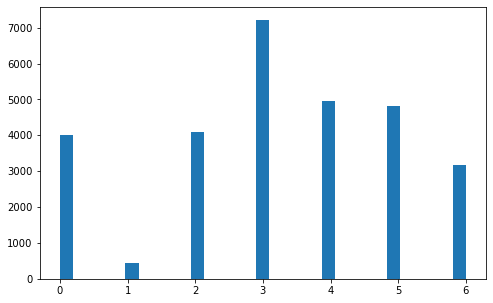

In [10]:
fig = plt.figure(figsize = (8,5))
plt.hist(training_labels, bins='auto')
plt.show()

# Data Visualization

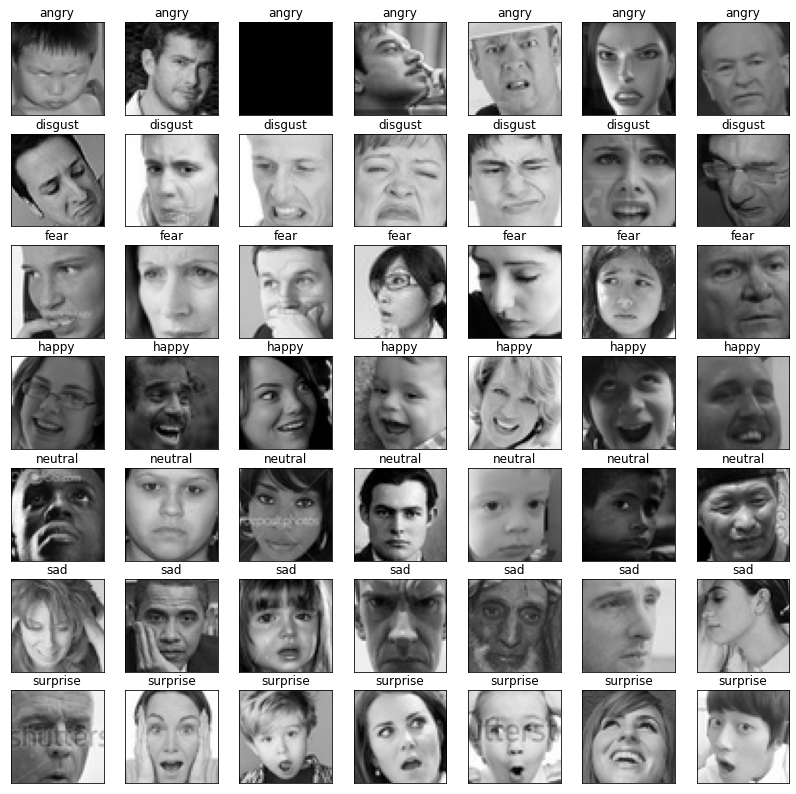

In [11]:
#let's take a look at a few images from every class
display_images = []
for i in range(7):
    display_images.append([])
cnt=0
for i in range(len(training_labels)):
    if cnt==49:
        break
    label = training_labels[i,0]
    if len(display_images[label])<7:
        display_images[label].append(training_images[i])
        cnt+=1

#Let's plot the images now
fig = plt.figure(1,(14,14))
k=1
for i in range(7):
    for img in display_images[i]:
        ax = plt.subplot(7,7,k)
        k+=1
        ax.set_title(num2emotion[i])
        ax.imshow(img)
        ax.set_xticks([])
        ax.set_yticks([])

# Model Training

In [12]:
#encoding labels through OneHotEncoding

def OneHotEncoding(labels):
    encoded_labels = np.zeros((len(labels),labels.max()+1))
    for idx,label in enumerate(labels):
        encoded_labels[idx,label[0]]=1
    return encoded_labels

training_labels = OneHotEncoding(training_labels)
testing_labels = OneHotEncoding(testing_labels)

In [13]:
X_train, X_val, y_train, y_val = train_test_split(training_images, training_labels,
                                                  test_size = 0.2, random_state = 0)

datagen = ImageDataGenerator(width_shift_range = 0.15,
                            height_shift_range = 0.15,
                            zoom_range = 0.15,
                            horizontal_flip=True)

In [14]:
from tensorflow.keras.applications.vgg19 import VGG19

base_model = VGG19(input_shape = (48,48,3), include_top = False)
base_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0     

In [15]:
#for layer in base_model.layers[:-4]:
#    layer.trainable=False

In [16]:
model = tf.keras.Sequential([
    base_model,
    Dropout(0.2),
    Flatten(),
    BatchNormalization(),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dense(7, activation='softmax')
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 1, 1, 512)         20024384  
_________________________________________________________________
dropout (Dropout)            (None, 1, 1, 512)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dense (Dense)                (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               2

In [18]:
model.compile(optimizer='adam', 
            loss = 'categorical_crossentropy', 
            metrics = ['accuracy'])

In [23]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=100,
    validation_data =(X_val, y_val))

718/718 [==============================] - 37s 51ms/step - loss: 0.8404 - accuracy: 0.7077 - val_loss: 1.0633 - val_accuracy: 0.6226


In [24]:
test_loss, test_acc = model.evaluate(testing_images, testing_labels)
print(test_acc)

225/225 [==============================] - 3s 15ms/step - loss: 1.0669 - accuracy: 0.6195
0.6195319294929504


In [25]:
model.save("VGG19.h5")